In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.sparse import vstack
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
file_path = '/content/IMDB Dataset.csv'
data = pd.read_csv(file_path)

stop_words = set(stopwords.words('english'))
additional_negative_stop_words = {
    "movie", "film", "one", "like", "good", "great", "time", "even", "would", "really",
    "see", "well", "get", "also", "much", "scene", "make", "think", "character", "plot",
    "watch", "story", "people", "way", "thing", "made", "say", "seem", "go", "look"
}
negative_stop_words = stop_words.union(additional_negative_stop_words)

lemmatizer = WordNetLemmatizer()

def preprocess_text_final(text, is_negative=False):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    if is_negative:
        cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in negative_stop_words]
    else:
        cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(cleaned_tokens)

data['cleaned_review'] = data.apply(lambda row: preprocess_text_final(row['review'], row['sentiment'] == 'negative'), axis=1)
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

<ipython-input-196-0141b0fd8e51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


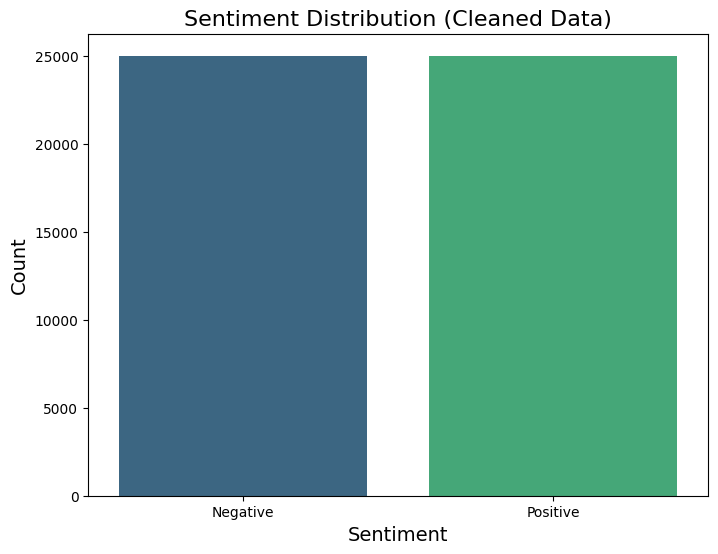

In [ ]:
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.title("Sentiment Distribution (Cleaned Data)", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

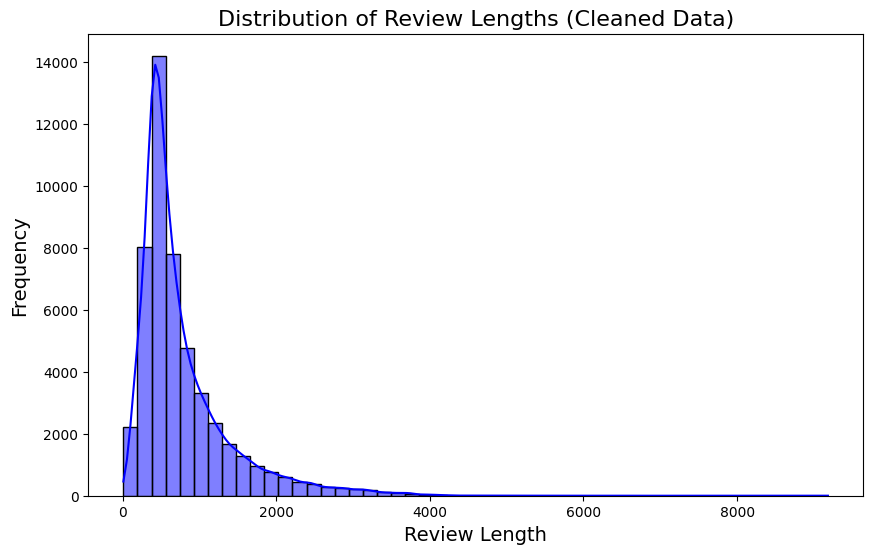

In [ ]:
review_lengths = data['cleaned_review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=50, kde=True, color="blue")
plt.title("Distribution of Review Lengths (Cleaned Data)", fontsize=16)
plt.xlabel("Review Length", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

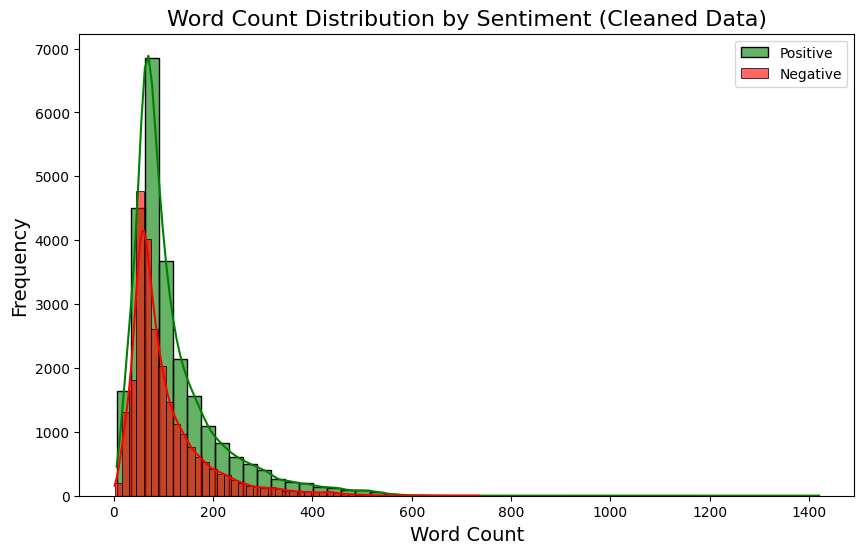

In [ ]:
positive_reviews = data[data['sentiment'] == 1]
negative_reviews = data[data['sentiment'] == 0]
positive_word_counts = positive_reviews['cleaned_review'].str.split().apply(len)
negative_word_counts = negative_reviews['cleaned_review'].str.split().apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(positive_word_counts, bins=50, kde=True, color="green", label="Positive", alpha=0.6)
sns.histplot(negative_word_counts, bins=50, kde=True, color="red", label="Negative", alpha=0.6)
plt.title("Word Count Distribution by Sentiment (Cleaned Data)", fontsize=16)
plt.xlabel("Word Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.show()

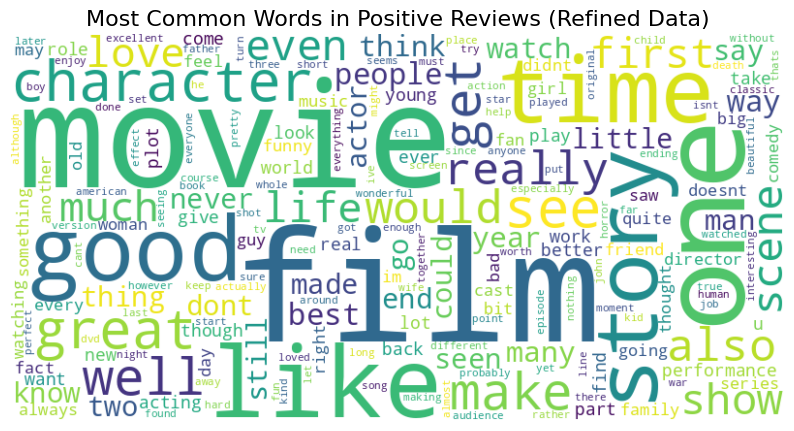

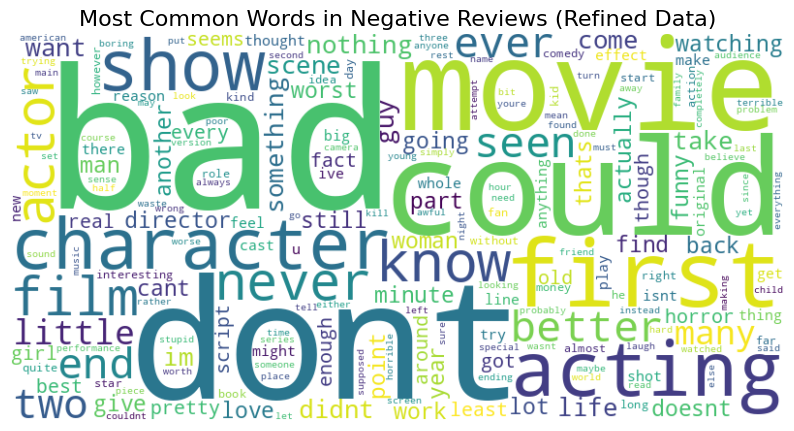

In [ ]:
positive_reviews = data[data['sentiment'] == 1]
positive_words = Counter(" ".join(positive_reviews['cleaned_review']).split())
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Positive Reviews (Refined Data)", fontsize=16)
plt.show()

negative_reviews = data[data['sentiment'] == 0]
negative_words = Counter(" ".join(negative_reviews['cleaned_review']).split())
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Reviews (Refined Data)", fontsize=16)
plt.show()


<ipython-input-200-b6a93fd53528>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['sentiment'] == 1]['polarity'], shade=True, color="green", label="Positive")
<ipython-input-200-b6a93fd53528>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['sentiment'] == 0]['polarity'], shade=True, color="red", label="Negative")


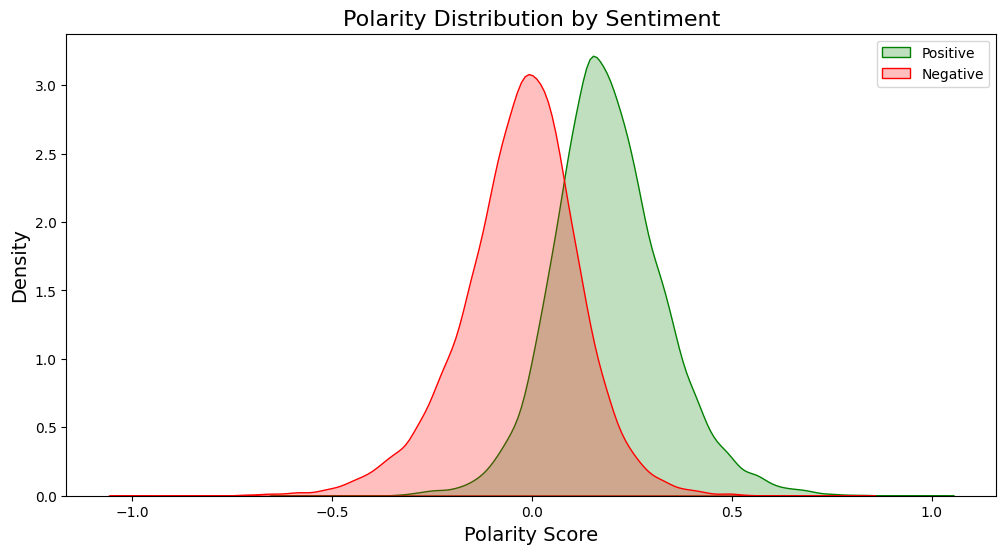

In [ ]:
data['polarity'] = data['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['sentiment'] == 1]['polarity'], shade=True, color="green", label="Positive")
sns.kdeplot(data[data['sentiment'] == 0]['polarity'], shade=True, color="red", label="Negative")
plt.title("Polarity Distribution by Sentiment", fontsize=16)
plt.xlabel("Polarity Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.show()

<ipython-input-201-4fdecd6450cd>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_proportion = data.groupby('word_count_bins')['sentiment'].value_counts(normalize=True).unstack()


<Figure size 1200x600 with 0 Axes>

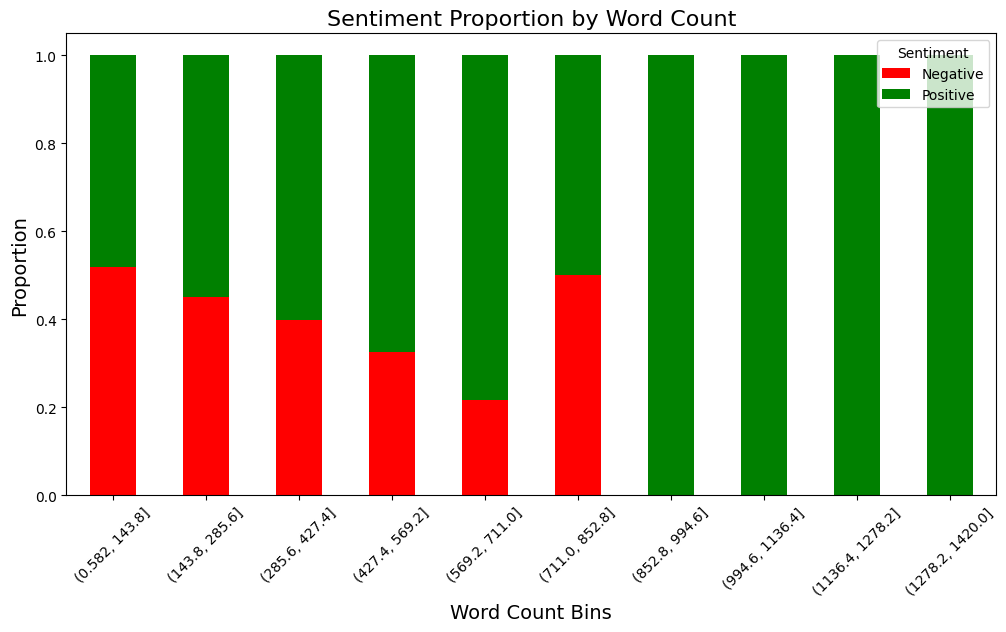

In [ ]:
data['word_count'] = data['cleaned_review'].str.split().apply(len)
data['word_count_bins'] = pd.cut(data['word_count'], bins=10)

plt.figure(figsize=(12, 6))
sentiment_proportion = data.groupby('word_count_bins')['sentiment'].value_counts(normalize=True).unstack()
sentiment_proportion.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 6))
plt.title("Sentiment Proportion by Word Count", fontsize=16)
plt.xlabel("Word Count Bins", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.legend(labels=["Negative", "Positive"], title="Sentiment")
plt.xticks(rotation=45)
plt.show()

In [ ]:
labeled_data, unlabeled_data = train_test_split(data, test_size=0.8, random_state=42)
unlabeled_data['sentiment'] = None

train_labeled, test_data = train_test_split(labeled_data, test_size=0.3, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_labeled = tfidf_vectorizer.fit_transform(train_labeled['review'])
y_labeled = train_labeled['sentiment']

X_unlabeled = tfidf_vectorizer.transform(unlabeled_data['review'])
X_test = tfidf_vectorizer.transform(test_data['review'])
y_test = test_data['sentiment']

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_labeled, y_labeled)

pseudo_labels_logistic = logistic_model.predict(X_unlabeled)

X_combined_logistic = vstack([X_labeled, X_unlabeled])
y_combined_logistic = np.concatenate([y_labeled, pseudo_labels_logistic])

logistic_model.fit(X_combined_logistic, y_combined_logistic)

y_pred_logistic = logistic_model.predict(X_test)

logistic_results = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1-Score": f1_score(y_test, y_pred_logistic),
}

logistic_results

{'Accuracy': 0.8723333333333333,
 'Precision': 0.8688010043942247,
 'Recall': 0.8883183568677792,
 'F1-Score': 0.8784512853062519}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_labeled, y_labeled)

pseudo_labels_rf = rf_model.predict(X_unlabeled)

X_combined_rf = vstack([X_labeled, X_unlabeled])
y_combined_rf = np.concatenate([y_labeled, pseudo_labels_rf])

rf_model.fit(X_combined_rf, y_combined_rf)

y_pred_rf = rf_model.predict(X_test)

rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
}

rf_results

{'Accuracy': 0.682,
 'Precision': 0.8355555555555556,
 'Recall': 0.48267008985879334,
 'F1-Score': 0.611879576891782}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_labeled, y_labeled)

pseudo_labels_dt = dt_model.predict(X_unlabeled)

X_combined_dt = vstack([X_labeled, X_unlabeled])
y_combined_dt = np.concatenate([y_labeled, pseudo_labels_dt])

dt_model.fit(X_combined_dt, y_combined_dt)

y_pred_dt = dt_model.predict(X_test)

dt_results = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1-Score": f1_score(y_test, y_pred_dt),
}
dt_results

{'Accuracy': 0.6766666666666666,
 'Precision': 0.6865482233502538,
 'Recall': 0.6944801026957638,
 'F1-Score': 0.6904913848117422}

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_labeled, y_labeled)

pseudo_labels_nb = nb_model.predict(X_unlabeled)

X_combined_nb = vstack([X_labeled, X_unlabeled])
y_combined_nb = np.concatenate([y_labeled, pseudo_labels_nb])

nb_model.fit(X_combined_nb, y_combined_nb)

y_pred_nb = nb_model.predict(X_test)

nb_results = {
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb),
    "Recall": recall_score(y_test, y_pred_nb),
    "F1-Score": f1_score(y_test, y_pred_nb),
}
nb_results

{'Accuracy': 0.8046666666666666,
 'Precision': 0.8403361344537815,
 'Recall': 0.7702182284980744,
 'F1-Score': 0.8037508372404555}

In [ ]:
from sklearn.svm import LinearSVC

linear_svm_model = LinearSVC(random_state=42)
linear_svm_model.fit(X_labeled, y_labeled)

pseudo_labels_svm = linear_svm_model.predict(X_unlabeled)

X_combined_svm = vstack([X_labeled, X_unlabeled])
y_combined_svm = np.concatenate([y_labeled, pseudo_labels_svm])

linear_svm_model.fit(X_combined_svm, y_combined_svm)

y_pred_linear_svm = linear_svm_model.predict(X_test)

linear_svm_results = {
    "Accuracy": accuracy_score(y_test, y_pred_linear_svm),
    "Precision": precision_score(y_test, y_pred_linear_svm),
    "Recall": recall_score(y_test, y_pred_linear_svm),
    "F1-Score": f1_score(y_test, y_pred_linear_svm),
}

linear_svm_results

{'Accuracy': 0.8686666666666667,
 'Precision': 0.8702290076335878,
 'Recall': 0.8780487804878049,
 'F1-Score': 0.8741214057507988}

In [ ]:
final_results = pd.DataFrame({
    "Logistic Regression": logistic_results,
    "Random Forest": rf_results,
    "Decision Tree": dt_results,
    "Naive Bayes": nb_results,
    "Support Vector Machine": linear_svm_results,
}).T

print(final_results)

                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.872333   0.868801  0.888318  0.878451
Random Forest           0.682000   0.835556  0.482670  0.611880
Decision Tree           0.676667   0.686548  0.694480  0.690491
Naive Bayes             0.804667   0.840336  0.770218  0.803751
Support Vector Machine  0.868667   0.870229  0.878049  0.874121
